<a href="https://colab.research.google.com/github/andilake/BeduF3M5/blob/main/Proyecto_Final_Equipo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final

## Equipo 6

- Bertha Alicia Domínguez Díaz
- Andrea Lagunes Kern
- Sergio Legorreta
- Carlos Alberto Vaquera Araujo
- José Ezequiel Contreras Hernández

## Objetivo

El objetivo de nuestro proyecto es utilizar técnicas de aprendizaje automático para clasificar de manera precisa y eficiente si un objeto es un exoplaneta o no. Para lograr esto, analizaremos el dataset de exoplanetas de la NASA utilizando diferentes algoritmos de clasificación, como árboles de decisión, redes neuronales y SVM, y evaluaremos su rendimiento en términos de precisión, sensibilidad y especificidad. El resultado final será un modelo de aprendizaje automático capaz de identificar con precisión los exoplanetas y, potencialmente, descubrir nuevos objetos de este tipo en el futuro. Este proyecto puede contribuir al avance del conocimiento en astrofísica y tener aplicaciones en la búsqueda de vida extraterrestre en otros planetas.

## Información del dataset

Se descargó desde el sitio web [Nasa Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative) el dataset a analizar, el cual contiene información sobre posibles exoplanetas detectados utilizando el telescopio Kepler. Cada etiqueta de columna proporciona información sobre diferentes propiedades de los exoplanetas.

Las información que contiene este archivo es la siguiente:
*   'kepid': es el ID único asignado por la misión Kepler a cada objeto estudiado.
*   'kepoi_name': es el nombre asignado por el equipo de investigación de Kepler al objeto en cuestión.
*   'kepler_name': es el nombre dado por el equipo de investigación de Kepler al sistema planetario del cual el objeto es parte.
*   'koi_disposition': indica la disposición (clasificación) de los datos del objeto. Esta columna se utiliza para indicar si se ha confirmado o refutado la existencia de un exoplaneta en el sistema en cuestión.
*   'koi_pdisposition': es una disposición adicional, que indica si el objeto es un planeta candidato o si ya se ha confirmado como planeta.
*   'koi_score': es la medida de confianza asignada por el equipo de investigación a la disposición del objeto.
*   'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec': son banderas de calidad que indican si el objeto tiene algún problema de calidad, como por ejemplo interferencia de luz de una estrella cercana o alguna otra fuente de error.
*   'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag': son características del objeto y su sistema, como por ejemplo la duración de su órbita, su tamaño, la temperatura de su superficie, la magnitud de la estrella, entre otras. Estas características se han obtenido a partir del análisis de los datos obtenidos por el telescopio Kepler.

## Creación y limpieza del dataframe

Se importan las librerías a utilizar.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

Se crea el dataframe.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Por medio de la función shape, se observa que hay 55 columnas y 9464 filas.

In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1J0voyBfuXeKAJ7Xa-sGUBsknD5p5ehjNdX7xQ__IuMc/edit#gid=1651167388"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_kepler = pd.read_csv(url, sep=',', comment='#', low_memory=False)

df_kepler.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.096,0.927,0.105,-0.061,0.919,0.052,-0.046,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-0.096,0.927,0.105,-0.061,0.919,0.052,-0.046,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-0.176,0.868,0.233,-0.078,0.961,0.110,-0.121,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-0.168,0.791,0.201,-0.067,0.836,0.093,-0.077,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.210,1.046,0.334,-0.133,1.095,0.151,-0.136,288.75488,48.226200,15.509


In [ ]:
df_kepler.shape

(9564, 55)

Se obtienen los nombres de las columnas para definir cuáles servirán para el análisis a realizar.

In [ ]:
df_kepler.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_sma', 'koi_sma_err1', 'koi_sma_err2', 'koi_teq',
       'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'koi_smass', 'koi_smass_err1',
       'koi_smass_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='objec

Se eliminan las columnas que no son relevantes para el análisis estadístico o contienen información redundante.

In [ ]:
df_kepler_clean = df_kepler.copy()
df_kepler_clean.drop(['kepoi_name', 'kepler_name', 'koi_score', 'koi_tce_delivname', 'koi_tce_plnt_num'], axis=1, inplace=True)
df_kepler_clean = df_kepler_clean.loc[:,~df_kepler_clean.columns.str.contains('err')]
df_kepler_clean.shape

(9564, 24)

In [ ]:
df_kepler_clean.head()

,kepid,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,...,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_smass,ra,dec,koi_kepmag
0,10797460,CONFIRMED,CANDIDATE,0,0,0,0,9.488036,170.538750,0.146,...,793.0,93.59,35.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,10797460,CONFIRMED,CANDIDATE,0,0,0,0,54.418383,162.513840,0.586,...,443.0,9.11,25.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,10811496,CANDIDATE,CANDIDATE,0,0,0,0,19.899140,175.850252,0.969,...,638.0,39.30,76.3,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
3,10848459,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,...,1395.0,891.96,505.6,5805.0,4.564,0.791,0.836,285.53461,48.285210,15.597
4,10854555,CONFIRMED,CANDIDATE,0,0,0,0,2.525592,171.595550,0.701,...,1406.0,926.16,40.9,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509


A continuación se obtiene el tipo de dato de cada columna para verificar que sean correctos.

In [ ]:
pd.set_option('display.max_rows', 50)
print(df_kepler_clean.dtypes)

kepid                 int64
koi_disposition      object
koi_pdisposition     object
koi_fpflag_nt         int64
koi_fpflag_ss         int64
koi_fpflag_co         int64
koi_fpflag_ec         int64
koi_period          float64
koi_time0bk         float64
koi_impact          float64
koi_duration        float64
koi_depth           float64
koi_prad            float64
koi_sma             float64
koi_teq             float64
koi_insol           float64
koi_model_snr       float64
koi_steff           float64
koi_slogg           float64
koi_srad            float64
koi_smass           float64
ra                  float64
dec                 float64
koi_kepmag          float64
dtype: object


Se renombran las columnas.

In [ ]:
df_kepler_clean.rename(columns={'koi_disposition': 'disposicion_archivo', 'koi_pdisposition': 'disposicion_datos_kepler', 'koi_fpflag_nt': 'transito_contaminante_no_transitivo', 
                   'koi_fpflag_ss': 'transito_contaminante_estrella_secundaria', 'koi_fpflag_co': 'transito_contaminante_eclipsante_binario', 'koi_fpflag_ec': 'transito_contaminante_candidato_eclipsante_binario', 
                   'koi_period': 'periodo_de_transito', 'koi_time0bk': 'tiempo_transito_referencia', 'koi_impact': 'impacto_estelar', 
                   'koi_duration': 'duracion_de_transito', 'koi_depth': 'profundidad_de_transito', 'koi_prad': 'radio_planetario', 'koi_sma':'semi_major_axis',
                   'koi_teq': 'temperatura_equilibrio', 'koi_insol': 'insolacion_recibida', 'koi_model_snr': 'modelo_snr', 
                   'koi_steff': 'temperatura_efectiva_estrella_anfitriona', 'koi_slogg': 'gravedad_superficial_estrella_anfitriona', 
                   'koi_srad': 'radio_de_estrella_anfitriona', 'koi_smass':'masa_estrella','ra': 'ascension_recta_estrella', 'dec': 'declinacion_estrella', 'koi_kepmag': 'magnitud_aparente_estrella_anfitriona'}, inplace=True)

Se obtienen los NaNs por columna y se decide cuáles columnas es necesario limpiar.

In [ ]:
nans_por_columna = df_kepler_clean.isna().sum(axis=0)

print('Valores nulos por columna')
print(nans_por_columna)

Valores nulos por columna
kepid                                                   0
disposicion_archivo                                     0
disposicion_datos_kepler                                0
transito_contaminante_no_transitivo                     0
transito_contaminante_estrella_secundaria               0
transito_contaminante_eclipsante_binario                0
transito_contaminante_candidato_eclipsante_binario      0
periodo_de_transito                                     0
tiempo_transito_referencia                              0
impacto_estelar                                       363
duracion_de_transito                                    0
profundidad_de_transito                               363
radio_planetario                                      363
semi_major_axis                                       363
temperatura_equilibrio                                363
insolacion_recibida                                   321
modelo_snr                                    

Se eliminan los valores nulos.

In [ ]:
df_kepler_clean = df_kepler_clean.dropna().reset_index(drop=True)
df_kepler_clean

,kepid,disposicion_archivo,disposicion_datos_kepler,transito_contaminante_no_transitivo,transito_contaminante_estrella_secundaria,transito_contaminante_eclipsante_binario,transito_contaminante_candidato_eclipsante_binario,periodo_de_transito,tiempo_transito_referencia,impacto_estelar,...,temperatura_equilibrio,insolacion_recibida,modelo_snr,temperatura_efectiva_estrella_anfitriona,gravedad_superficial_estrella_anfitriona,radio_de_estrella_anfitriona,masa_estrella,ascension_recta_estrella,declinacion_estrella,magnitud_aparente_estrella_anfitriona
0,10797460,CONFIRMED,CANDIDATE,0,0,0,0,9.488036,170.538750,0.146,...,793.0,93.59,35.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,10797460,CONFIRMED,CANDIDATE,0,0,0,0,54.418383,162.513840,0.586,...,443.0,9.11,25.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,10811496,CANDIDATE,CANDIDATE,0,0,0,0,19.899140,175.850252,0.969,...,638.0,39.30,76.3,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
3,10848459,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,...,1395.0,891.96,505.6,5805.0,4.564,0.791,0.836,285.53461,48.285210,15.597
4,10854555,CONFIRMED,CANDIDATE,0,0,0,0,2.525592,171.595550,0.701,...,1406.0,926.16,40.9,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,10090151,FALSE POSITIVE,FALSE POSITIVE,0,1,1,0,0.527699,131.705093,1.252,...,2088.0,4500.53,453.3,5638.0,4.529,0.903,1.005,297.18875,47.093819,14.082
9196,10128825,CANDIDATE,CANDIDATE,0,0,0,0,1.739849,133.001270,0.043,...,1608.0,1585.81,10.6,6119.0,4.444,1.031,1.075,286.50937,47.163219,14.757
9197,10147276,FALSE POSITIVE,FALSE POSITIVE,0,0,1,0,0.681402,132.181750,0.147,...,2218.0,5713.41,12.3,6173.0,4.447,1.041,1.104,294.16489,47.176281,15.385
9198,10155286,CANDIDATE,CANDIDATE,0,0,0,0,333.486169,153.615010,0.214,...,557.0,22.68,14.0,4989.0,2.992,7.824,2.190,296.76288,47.145142,10.998


## Estimados de locación y variabilidad

### Periodo de tránsito

In [ ]:
promedio_periodo = df_kepler_clean["periodo_de_transito"].mean()
std_periodo = df_kepler_clean["periodo_de_transito"].std()
minimo_periodo = df_kepler_clean["periodo_de_transito"].min()
maximo_periodo = df_kepler_clean["periodo_de_transito"].max()
q1_periodo = df_kepler_clean["periodo_de_transito"].quantile(0.25)
q3_periodo = df_kepler_clean["periodo_de_transito"].quantile(0.75)

In [ ]:
print(f'Promedio: {promedio_periodo:,.2f}')
print(f'Desviación estándar: {std_periodo:,.2f}')
print(f'Valor mínimo: {minimo_periodo:,.2f}')
print(f'Percentil 10: {df_kepler_clean["periodo_de_transito"].quantile(0.1):,.2f}')
print(f'Percentil 25: {q1_periodo:,.2f}')
print(f'Mediana: {df_kepler_clean["periodo_de_transito"].median():,.2f}')
print(f'Percentil 75: {q3_periodo:,.2f}')
print(f'Percentil 90: {df_kepler_clean["periodo_de_transito"].quantile(0.9):,.2f}')
print(f'Valor máximo: {maximo_periodo:,.2f}')
print(f'Rango: {maximo_periodo - minimo_periodo:,.2f}')
print(f'Rango intercuartil: {q3_periodo - q1_periodo:,.2f}')

Promedio: 74.32
Desviación estándar: 1,360.61
Valor mínimo: 0.24
Percentil 10: 0.97
Percentil 25: 2.68
Mediana: 9.30
Percentil 75: 36.87
Percentil 90: 220.20
Valor máximo: 129,995.78
Rango: 129,995.54
Rango intercuartil: 34.19


El promedio del periodo de tránsito (74.32 días) es mucho más grande que la mediana (9.30 días), lo que sugiere que la distribución de los periodos de tránsito tiene un sesgo hacia la derecha (positivo). Esto podría deberse a la presencia de valores extremadamente grandes, como el valor máximo que es mayor a 350 años (129,995.78 días). En general, los percentiles más bajos sugieren que la mayoría de los periodos de tránsito son bastante cortos, mientras que los percentiles más altos sugieren que hay un número relativamente pequeño de periodos de tránsito extremadamente largos. Además, el rango total de los valores es de 129,995.54, mientras que el rango intercuartil es de 34.19, lo que indica la presencia de valores atípicos extremadamente grandes.

Ya que existe un sesgo muy pronunciado, es necesario calcular la media truncada, para lo cual se usará un porcentaje del 30% para intentar quitar la mayoría de valores atípicos.

In [ ]:
from scipy.stats import trim_mean

print(f'La media truncada es: {trim_mean(df_kepler_clean["periodo_de_transito"], 0.3):,.2f}')

La media truncada es: 10.85


### Radio planetario

In [ ]:
promedio_radio = df_kepler_clean["radio_planetario"].mean()
std_radio = df_kepler_clean["radio_planetario"].std()
minimo_radio = df_kepler_clean["radio_planetario"].min()
maximo_radio = df_kepler_clean["radio_planetario"].max()
q1_radio = df_kepler_clean["radio_planetario"].quantile(0.25)
q3_radio = df_kepler_clean["radio_planetario"].quantile(0.75)

In [ ]:
print(f'Promedio: {promedio_radio:,.2f}')
print(f'Desviación estándar: {std_radio:,.2f}')
print(f'Valor mínimo: {minimo_radio:,.2f}')
print(f'Percentil 10: {df_kepler_clean["radio_planetario"].quantile(0.1):,.2f}')
print(f'Percentil 25: {q1_radio:,.2f}')
print(f'Mediana: {df_kepler_clean["radio_planetario"].median():,.2f}')
print(f'Percentil 75: {q3_radio:,.2f}')
print(f'Percentil 90: {df_kepler_clean["radio_planetario"].quantile(0.9):,.2f}')
print(f'Valor máximo: {maximo_radio:,.2f}')
print(f'Rango: {maximo_radio - minimo_radio:,.2f}')
print(f'Rango intercuartil: {q3_radio - q1_radio:,.2f}')

Promedio: 102.90
Desviación estándar: 3,077.81
Valor mínimo: 0.08
Percentil 10: 0.94
Percentil 25: 1.40
Mediana: 2.39
Percentil 75: 14.93
Percentil 90: 52.84
Valor máximo: 200,346.00
Rango: 200,345.92
Rango intercuartil: 13.53


El promedio del radio planetario es mucho más grande que la mediana (2.39), lo que sugiere que la distribución de los valores tiene un sesgo hacia la derecha (positivo). Esto podría deberse a la presencia de valores extremadamente grandes, como el valor máximo que es mayor a 200,000. En general, los percentiles más bajos sugieren que la mayoría de los radios planetarios son bastante pequeños, mientras que los percentiles más altos sugieren que hay un número relativamente pequeño de radios extremadamente grandes. Además, el rango total de los valores es de 200,345.92, mientras que el rango intercuartil es de 13.53, lo que indica la presencia de valores atípicos extremadamente grandes.

Ya que existe un sesgo muy pronunciado, es necesario calcular la media truncada, para lo cual se usará un porcentaje del 30% para intentar quitar la mayoría de valores atípicos.

In [ ]:
print(f'La media truncada es: {trim_mean(df_kepler_clean["radio_planetario"], 0.3):,.2f}')

La media truncada es: 2.73


In [ ]:
total_muestras = df_kepler_clean["radio_planetario"].size
print(f'Se analizaron un total de {total_muestras:,} muestras')

Se analizaron un total de 9,200 muestras


## Visualización de datos y limpieza de datos atípicos

### Periodo de tránsito

Se crea el boxplot pero como hay valores atípicos muy grandes, no se visualiza correctamente.

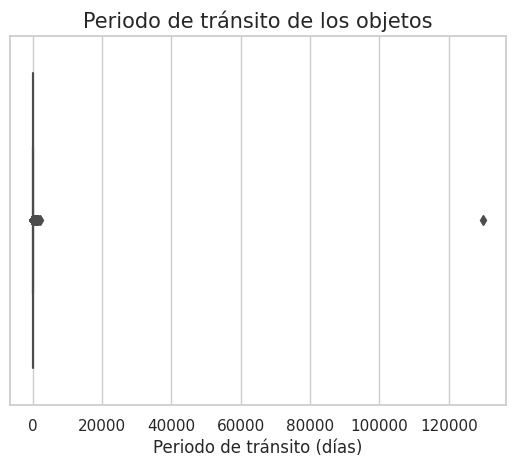

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_kepler_clean['periodo_de_transito'])
ax.set_title('Periodo de tránsito de los objetos', fontsize=15)
ax.set(xlabel='Periodo de tránsito (días)');

In [ ]:
def filtro_1(df,col):
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  filtro_inferior = df[col] > df[col].quantile(0.25) - (iqr * 1.5)
  filtro_superior = df[col] < df[col].quantile(0.75) + (iqr * 1.5)
  return  df[filtro_inferior & filtro_superior]

def filtro_2(df, iqr_score):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df

df_filtrado = df_kepler_clean.copy()
df_filtrado = filtro_1(df_kepler_clean, 'periodo_de_transito')
periodo_filtrado = filtro_2(df_filtrado['periodo_de_transito'], 1.5)
df_filtrado['periodo_de_transito'] = periodo_filtrado

<ipython-input-20-ed3a6b8602ae>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['periodo_de_transito'] = periodo_filtrado


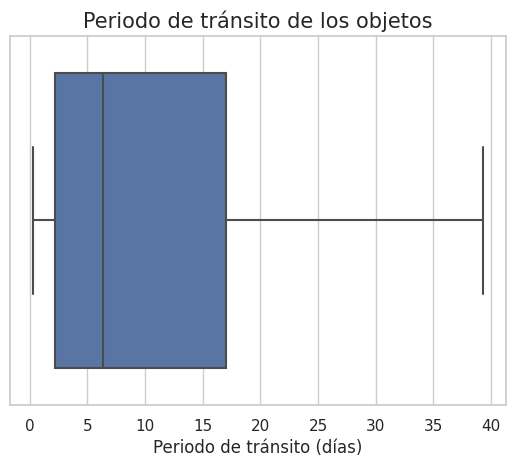

In [ ]:
ax = sns.boxplot(x=periodo_filtrado);
ax.set_title('Periodo de tránsito de los objetos', fontsize=15)
ax.set(xlabel='Periodo de tránsito (días)');

Usando el dataframe filtrado, se vuelven a calcular los estimados de locación y variabilidad.

In [ ]:
promedio_periodo_filtrado = periodo_filtrado.mean()
std_periodo_filtrado = periodo_filtrado.std()
minimo_periodo_filtrado = periodo_filtrado.min()
maximo_periodo_filtrado = periodo_filtrado.max()
q1_periodo_filtrado = df_filtrado['periodo_de_transito'].quantile(0.25)
q3_periodo_filtrado = df_filtrado['periodo_de_transito'].quantile(0.75)

In [ ]:
print(f'Promedio: {promedio_periodo_filtrado:,.2f}')
print(f'Desviación estándar: {std_periodo_filtrado:,.2f}')
print(f'Valor mínimo: {minimo_periodo_filtrado:,.2f}')
print(f'Percentil 10: {df_filtrado["periodo_de_transito"].quantile(0.1):,.2f}')
print(f'Percentil 25: {q1_periodo_filtrado:,.2f}')
print(f'Mediana: {df_filtrado["periodo_de_transito"].median():,.2f}')
print(f'Percentil 75: {q3_periodo_filtrado:,.2f}')
print(f'Percentil 90: {df_filtrado["periodo_de_transito"].quantile(0.9):,.2f}')
print(f'Valor máximo: {maximo_periodo_filtrado:,.2f}')
print(f'Rango: {maximo_periodo_filtrado - minimo_periodo_filtrado:,.2f}')
print(f'Rango intercuartil: {q3_periodo_filtrado - q1_periodo_filtrado:,.2f}')

Promedio: 11.66
Desviación estándar: 12.42
Valor mínimo: 0.24
Percentil 10: 0.92
Percentil 25: 2.15
Mediana: 6.33
Percentil 75: 17.03
Percentil 90: 37.61
Valor máximo: 39.35
Rango: 39.11
Rango intercuartil: 14.88


Usando los valores filtrados, se crea una tabla de frecuencias, un histograma y una gráfica de densidad.


In [ ]:
periodo = df_filtrado["periodo_de_transito"]
k_periodo =int(1 + np.ceil(np.log2(periodo.size)))
frecuencias_periodo = pd.cut(periodo, k_periodo)
frecuencias_periodo

0        (8.622, 11.416]
1        (36.557, 39.35]
2       (19.796, 22.589]
3         (0.203, 3.035]
4         (0.203, 3.035]
              ...       
9194      (5.829, 8.622]
9195      (0.203, 3.035]
9196      (0.203, 3.035]
9197      (0.203, 3.035]
9199      (3.035, 5.829]
Name: periodo_de_transito, Length: 7693, dtype: category
Categories (14, interval[float64, right]): [(0.203, 3.035] < (3.035, 5.829] < (5.829, 8.622] <
                                            (8.622, 11.416] ... (28.176, 30.97] < (30.97, 33.763] <
                                            (33.763, 36.557] < (36.557, 39.35]]

In [ ]:
periodo.groupby(frecuencias_periodo).count()

periodo_de_transito
(0.203, 3.035]      2486
(3.035, 5.829]      1189
(5.829, 8.622]       797
(8.622, 11.416]      528
(11.416, 14.209]     445
(14.209, 17.003]     324
(17.003, 19.796]     266
(19.796, 22.589]     219
(22.589, 25.383]     173
(25.383, 28.176]     138
(28.176, 30.97]      115
(30.97, 33.763]      112
(33.763, 36.557]      99
(36.557, 39.35]      802
Name: periodo_de_transito, dtype: int64

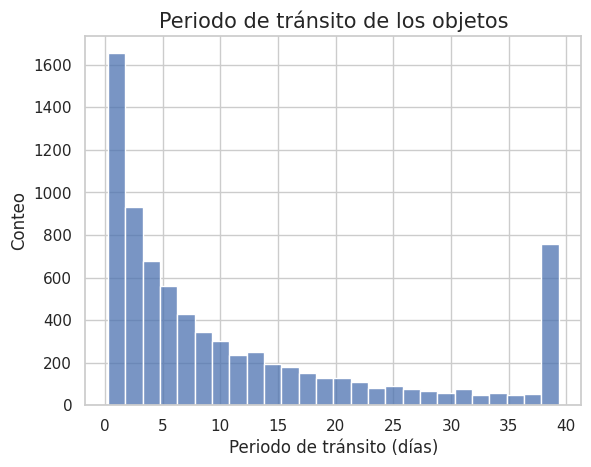

In [ ]:
ax = sns.histplot(periodo, kde=False);
ax.set_title('Periodo de tránsito de los objetos', fontsize=15)
ax.set(xlabel='Periodo de tránsito (días)', ylabel='Conteo');

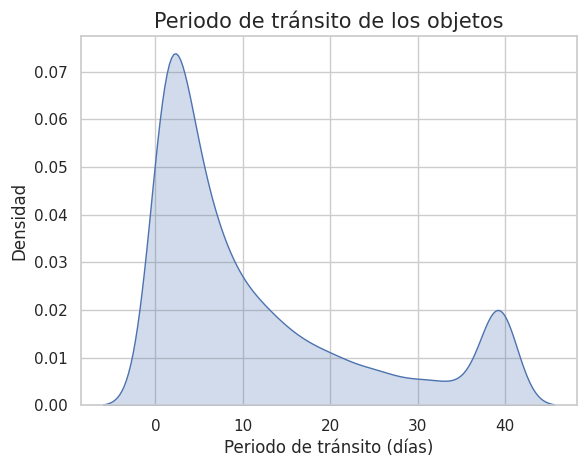

In [ ]:
ax = sns.kdeplot(periodo, fill=True);
ax.set_title('Periodo de tránsito de los objetos', fontsize=15)
ax.set(xlabel='Periodo de tránsito (días)', ylabel='Densidad');

In [ ]:
print(f'Asimetría: {stats.skew(periodo)}')
print(f'Curtosis: {stats.kurtosis(periodo)}')

Asimetría: 1.1893337306430811
Curtosis: 0.1159150318682931


### Radio planetario

Se crea el boxplot pero como hay valores atípicos muy grandes, no se visualiza correctamente.

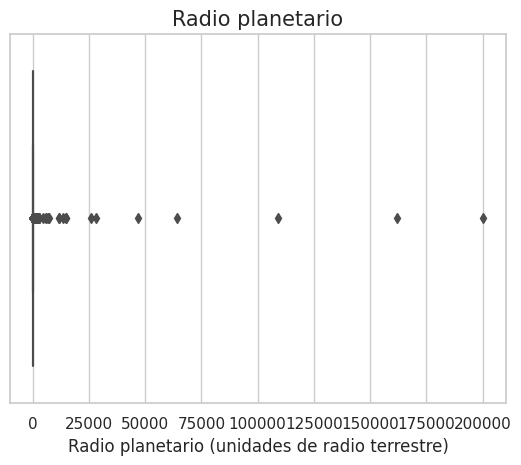

In [ ]:
ax = sns.boxplot(x=df_kepler_clean['radio_planetario']);
ax.set_title('Radio planetario', fontsize=15)
ax.set(xlabel='Radio planetario (unidades de radio terrestre)');

Se filtran los valores atípicos y se vuelve a realizar el boxplot.

In [ ]:
df_filtrado = filtro_1(df_filtrado, 'radio_planetario')
radio_filtrado = filtro_2(df_filtrado['radio_planetario'], 2)
df_filtrado["radio_planetario"] = radio_filtrado

<ipython-input-30-fbcf4e376b92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["radio_planetario"] = radio_filtrado


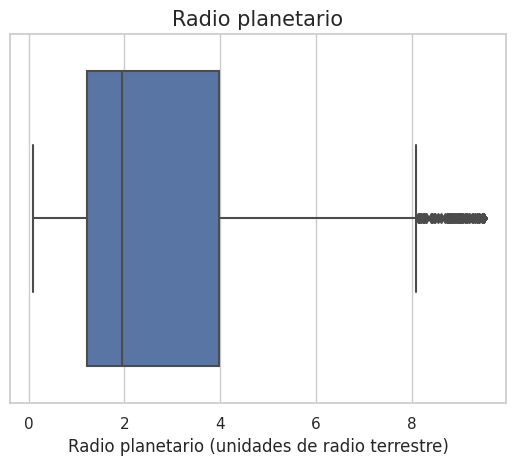

In [ ]:
ax = sns.boxplot(x=radio_filtrado);
ax.set_title('Radio planetario', fontsize=15)
ax.set(xlabel='Radio planetario (unidades de radio terrestre)');

Usando el dataframe filtrado, se vuelven a calcular los estimados de locación y variabilidad y se encuentra que aún existen valores atípicamente grandes y sesgo a la derecha, pero la mayoría de los valores se encuentran muy cercanos al 0.

In [ ]:
promedio_radio_filtrado = radio_filtrado.mean()
std_radio_filtrado = radio_filtrado.std()
minimo_radio_filtrado = radio_filtrado.min()
maximo_radio_filtrado = radio_filtrado.max()
q1_radio_filtrado = df_filtrado["radio_planetario"].quantile(0.25)
q3_radio_filtrado = df_filtrado["radio_planetario"].quantile(0.75)

In [ ]:
print(f'Promedio: {promedio_radio_filtrado:,.2f}')
print(f'Desviación estándar: {std_radio_filtrado:,.2f}')
print(f'Valor mínimo: {minimo_radio_filtrado:,.2f}')
print(f'Percentil 10: {df_filtrado["radio_planetario"].quantile(0.1):,.2f}')
print(f'Percentil 25: {q1_radio_filtrado:,.2f}')
print(f'Mediana: {df_filtrado["radio_planetario"].median():,.2f}')
print(f'Percentil 75: {q3_radio_filtrado:,.2f}')
print(f'Percentil 90: {df_filtrado["radio_planetario"].quantile(0.9):,.2f}')
print(f'Valor máximo: {maximo_radio_filtrado:,.2f}')
print(f'Rango: {maximo_radio_filtrado - minimo_radio_filtrado:,.2f}')
print(f'Rango intercuartil: {q3_radio_filtrado - q1_radio_filtrado:,.2f}')

Promedio: 3.42
Desviación estándar: 3.18
Valor mínimo: 0.08
Percentil 10: 0.85
Percentil 25: 1.22
Mediana: 1.94
Percentil 75: 3.98
Percentil 90: 9.50
Valor máximo: 9.50
Rango: 9.42
Rango intercuartil: 2.76


Usando los valores filtrados, se crea una tabla de frecuencias, un histograma y una gráfica de densidad.

In [ ]:
radio = df_filtrado['radio_planetario']
k_radio =int(1 + np.ceil(np.log2(radio.size)))
frecuencias_radio = pd.cut(radio, k_radio)
frecuencias_radio

0        (2.099, 2.771]
1        (2.771, 3.444]
2          (8.827, 9.5]
3          (8.827, 9.5]
4        (2.099, 2.771]
             ...       
9194     (0.753, 1.426]
9195       (8.827, 9.5]
9196    (0.0706, 0.753]
9197     (0.753, 1.426]
9199     (0.753, 1.426]
Name: radio_planetario, Length: 6656, dtype: category
Categories (14, interval[float64, right]): [(0.0706, 0.753] < (0.753, 1.426] < (1.426, 2.099] <
                                            (2.099, 2.771] ... (6.809, 7.481] < (7.481, 8.154] <
                                            (8.154, 8.827] < (8.827, 9.5]]

In [ ]:
radio.groupby(frecuencias_radio).count()

radio_planetario
(0.0706, 0.753]     442
(0.753, 1.426]     1790
(1.426, 2.099]     1326
(2.099, 2.771]      841
(2.771, 3.444]      436
(3.444, 4.117]      179
(4.117, 4.79]       102
(4.79, 5.463]        83
(5.463, 6.136]       54
(6.136, 6.809]       38
(6.809, 7.481]       48
(7.481, 8.154]       34
(8.154, 8.827]       23
(8.827, 9.5]       1260
Name: radio_planetario, dtype: int64

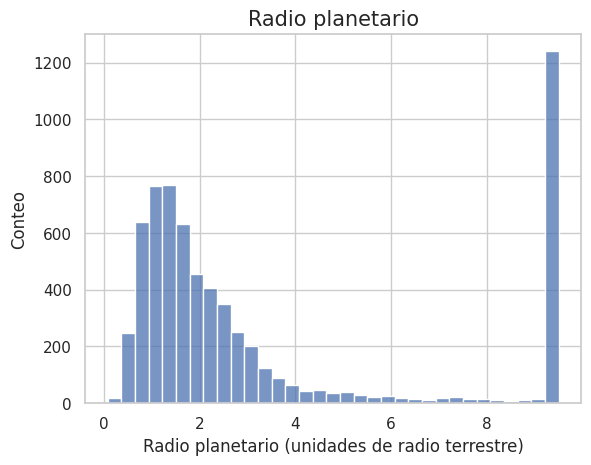

In [ ]:
ax = sns.histplot(radio, kde=False);
ax.set_title('Radio planetario', fontsize=15)
ax.set(xlabel='Radio planetario (unidades de radio terrestre)', ylabel='Conteo');

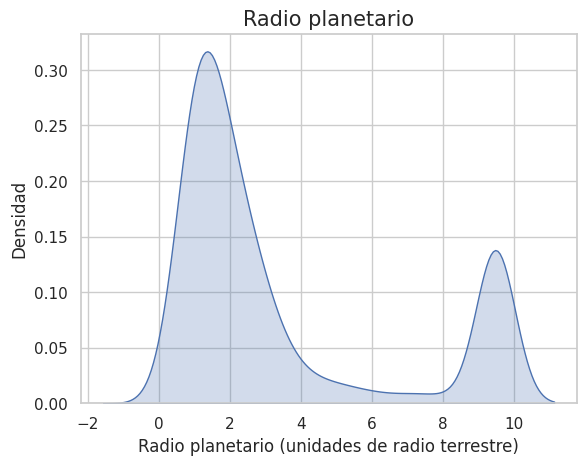

In [ ]:
ax = sns.kdeplot(radio, fill=True);
ax.set_title('Radio planetario', fontsize=15)
ax.set(xlabel='Radio planetario (unidades de radio terrestre)', ylabel='Densidad');

In [ ]:
print(f'Asimetría: {stats.skew(radio)}')
print(f'Curtosis: {stats.kurtosis(radio)}')

Asimetría: 1.1782668041246365
Curtosis: -0.28658349776623915


### Bootstrap, error estándar e intervalos de confianza

A continuación usaremos la técnica de bootstrap para explorar las distribuciones muestrales de la media para la medición del radio. En primer lugar definimos una función que recoja 100,000 muestras con remplazo de tamaño N.

In [ ]:
def sampling_means(x,N):
  means= []
  for i in range(100_000):
    sample = x.sample(n=N, replace=True)
    means.append(sample.mean())
  return pd.Series(means)

Obtenemos la distribución de medias de 100,000 muestras de tamaño 20% del total de la poblacion de medidas para el radio.

In [ ]:
serie_medias_radio= sampling_means(radio,int(np.floor(radio.size*0.2)))

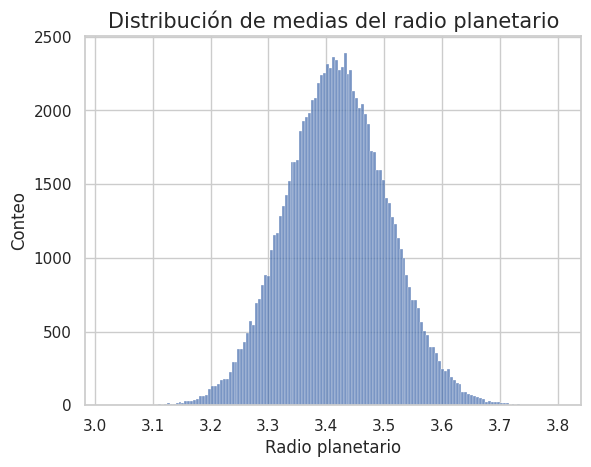

In [ ]:
ax = sns.histplot(serie_medias_radio, kde=False)
ax.set_title("Distribución de medias del radio planetario", fontsize=15)
ax.set(xlabel="Radio planetario", ylabel="Conteo");

In [ ]:
(serie_medias_radio.skew(),serie_medias_radio.kurtosis())

(0.04162903187317442, -0.0033954844558987674)

De estos resultados, se observa que la distribución de medias para las muestras obtenidas por bootstraping es aproximada por una distribución normal, cuyo error estandar está dado por la siguiente expresión:

In [ ]:
print(f'Error estandar media radio: {serie_medias_radio.std()}')

Error estandar media radio: 0.08744881416413229


Que concide con el estimado para esta cantidad que podemos obtener con la desviación estándar de la población y el tamaño de las muestras obtenidas por bootstraping:

In [ ]:
print(f'Estimación error estandar media radio: {radio.std()/np.sqrt(radio.size*0.2)}')

Estimación error estandar media radio: 0.08723745012057453


Los intervalos de confianza para la distribución de medias del radio están dados por las siguientes expresiones

In [ ]:
print(f'Intervalo de 90% confianza de la media: {serie_medias_radio.quantile(0.05)} < {serie_medias_radio.mean()} < {serie_medias_radio.quantile(0.95)}')
print(f'Intervalo de 95% confianza de la media: {serie_medias_radio.quantile(0.025)} < {serie_medias_radio.mean()} < {serie_medias_radio.quantile(0.975)}')
print(f'Intervalo de 99% confianza de la media: {serie_medias_radio.quantile(0.005)} < {serie_medias_radio.mean()} < {serie_medias_radio.quantile(0.995)}')

Intervalo de 90% confianza de la media: 3.2760931630353123 < 3.4182465922614584 < 3.5627836213373394
Intervalo de 95% confianza de la media: 3.2488580015026294 < 3.4182465922614584 < 3.591337340345605
Intervalo de 99% confianza de la media: 3.196844214876033 < 3.4182465922614584 < 3.6467779489105943


## Exploración de variables categóricas y análisis multivariable

### Disposición del objeto según datos y según archivo

El dataframe cuenta con dos variables categóricas, una que indica la disposición del planeta candidato según el archivo de exoplanetas de Kepler y otra que indica la disposición del planeta candidato según el análisis de los datos de Kepler.

En primer lugar se hace un conteo de los datos y una gráfica de barras para visualizar los datos que se tienen.

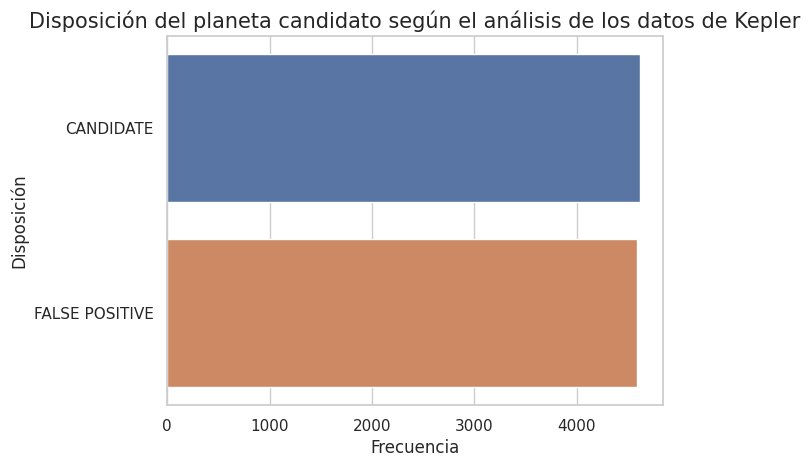

In [ ]:
planet_type_counts_2 = df_kepler_clean['disposicion_datos_kepler'].value_counts().reset_index()
ax2 = sns.barplot(data=planet_type_counts_2,x='disposicion_datos_kepler', y='index', orient='h')
ax2.set_title('Disposición del planeta candidato según el análisis de los datos de Kepler', fontsize=15)
ax2.set(xlabel='Frecuencia', ylabel='Disposición');

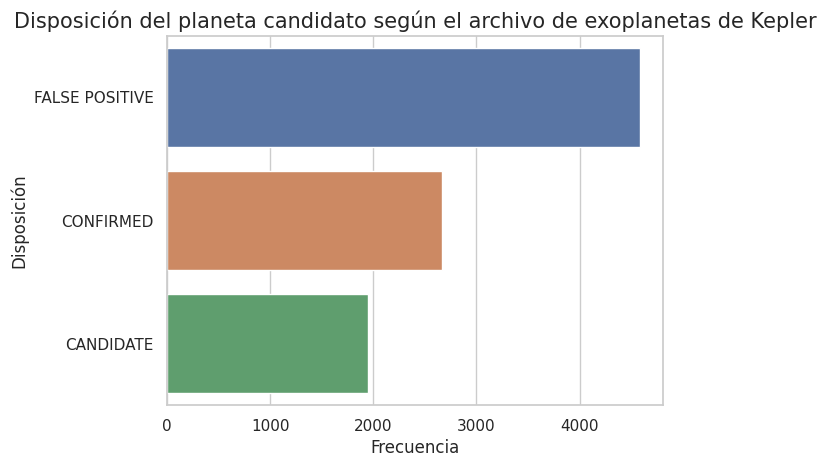

In [ ]:
planet_type_counts = df_kepler_clean['disposicion_archivo'].value_counts().reset_index()
ax1 = sns.barplot(data=planet_type_counts,x='disposicion_archivo', y='index', orient='h')
ax1.set_title('Disposición del planeta candidato según el archivo de exoplanetas de Kepler', fontsize=15)
ax1.set(xlabel='Frecuencia', ylabel='Disposición');

Se genera una tabla de contingencia para comparar ambas variables.

In [ ]:
crosstab = pd.crosstab(df_kepler_clean['disposicion_archivo'], df_kepler_clean['disposicion_datos_kepler'])
crosstab

disposicion_datos_kepler,CANDIDATE,FALSE POSITIVE
disposicion_archivo,,
CANDIDATE,1949,0
CONFIRMED,2662,8
FALSE POSITIVE,1,4580


De acuerdo a la tabla de contingencia, se obtiene que 2662 de los objetos marcados como candidatos usando los datos, fueron confirmados como exoplanetas en el archivo y uno de ellos fue marcado como falso positivo. Además, 8 exoplanetas que estaban clasificados como falso positivo, fueron confirmados. A continuación se muestran las gráficas de barras de la tabla de contingencia.

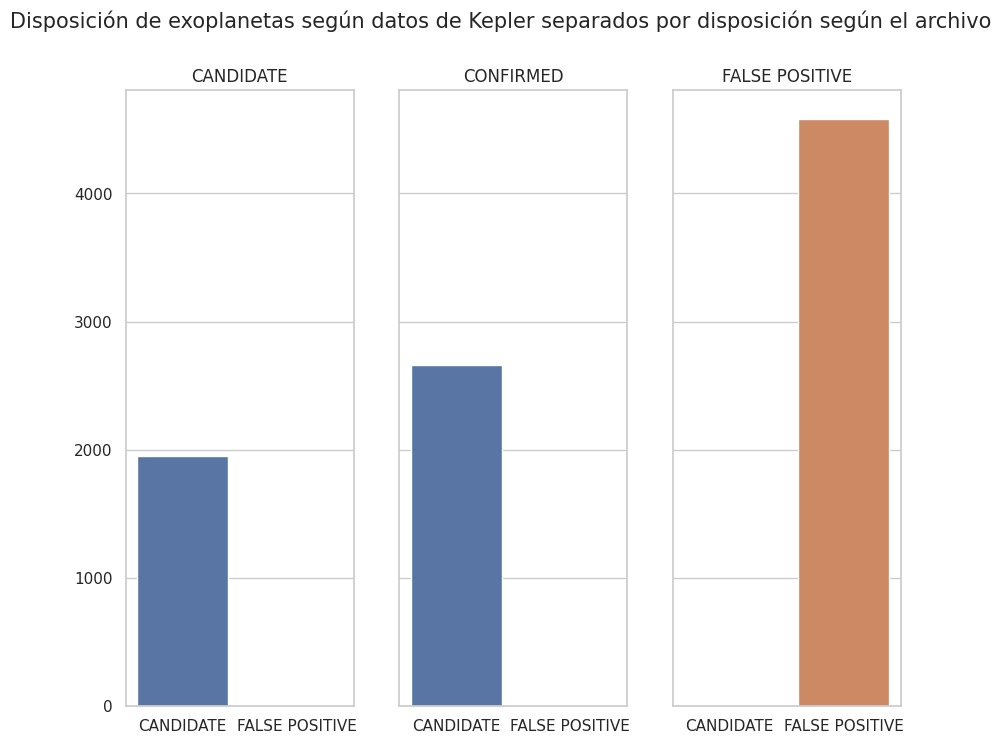

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab.loc['CANDIDATE'].index, y=crosstab.loc['CANDIDATE'].values, ax=axes[0])
sns.barplot(x=crosstab.loc['CONFIRMED'].index, y=crosstab.loc['CONFIRMED'].values, ax=axes[1])
sns.barplot(x=crosstab.loc['FALSE POSITIVE'].index, y=crosstab.loc['FALSE POSITIVE'].values, ax=axes[2])

axes[0].set(xlabel='', ylabel='', title='CANDIDATE')
axes[1].set(xlabel='', ylabel='', title='CONFIRMED')
axes[2].set(xlabel='', ylabel='', title='FALSE POSITIVE')

fig.suptitle('Disposición de exoplanetas según datos de Kepler separados por disposición según el archivo', fontsize=15);

plt.show()

### Disposición del objeto y periodo de tránsito

Se busca ahora encontrar si hay alguna diferencia entre el periodo de los exoplanetas confirmados, candidatos y falsos positivos, por lo que se realizan boxplots y violinplots.

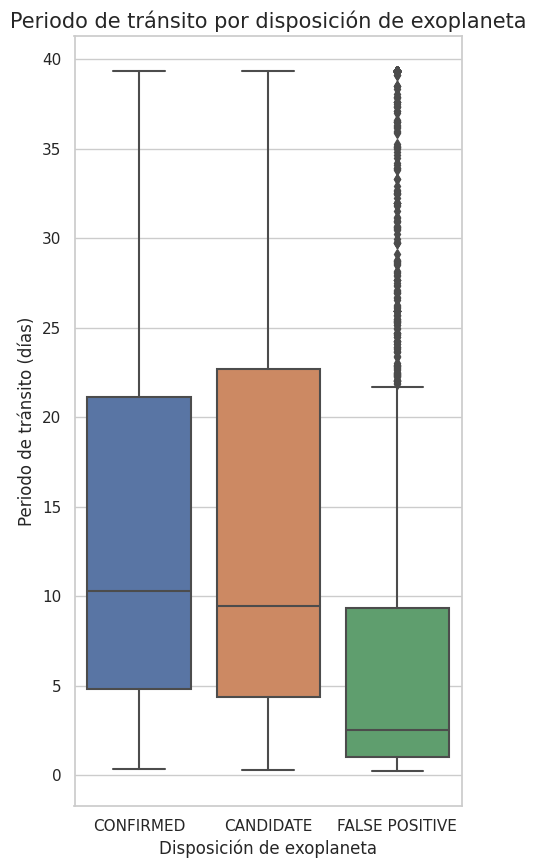

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.boxplot(data=df_filtrado, x='disposicion_archivo', y='periodo_de_transito')
ax.set_title("Periodo de tránsito por disposición de exoplaneta", fontsize=15)
ax.set(xlabel="Disposición de exoplaneta", ylabel="Periodo de tránsito (días)");

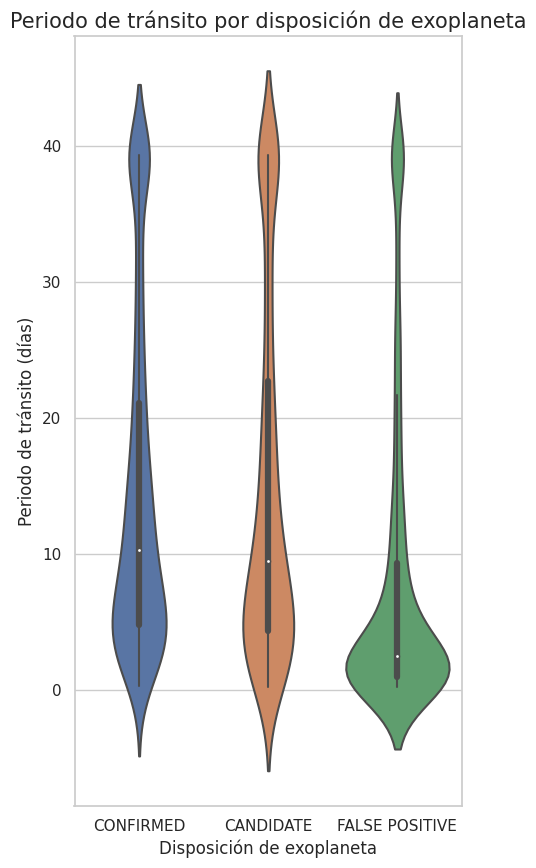

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.violinplot(data=df_filtrado, x='disposicion_archivo', y='periodo_de_transito')
ax.set_title("Periodo de tránsito por disposición de exoplaneta", fontsize=15)
ax.set(xlabel="Disposición de exoplaneta", ylabel="Periodo de tránsito (días)");

Se observa en los falsos positivos un periodo de tránsito más corto que en los exoplanetas confirmados y los candidatos.

### Disposición del objeto y radio planetario

Se busca ahora encontrar si hay alguna diferencia entre el periodo de los exoplanetas confirmados, candidatos y falsos positivos, por lo que se realizan boxplots y violinplots.

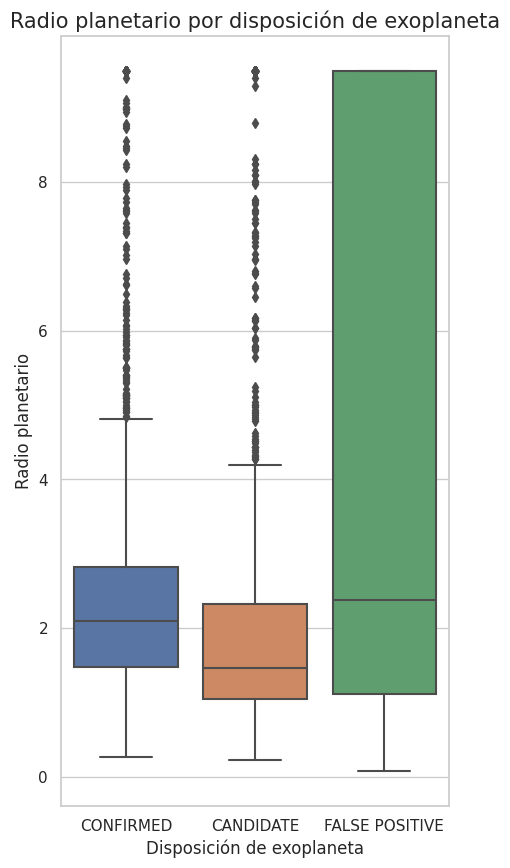

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.boxplot(data=df_filtrado, x='disposicion_archivo', y='radio_planetario')
ax.set_title("Radio planetario por disposición de exoplaneta", fontsize=15)
ax.set(xlabel="Disposición de exoplaneta", ylabel="Radio planetario");

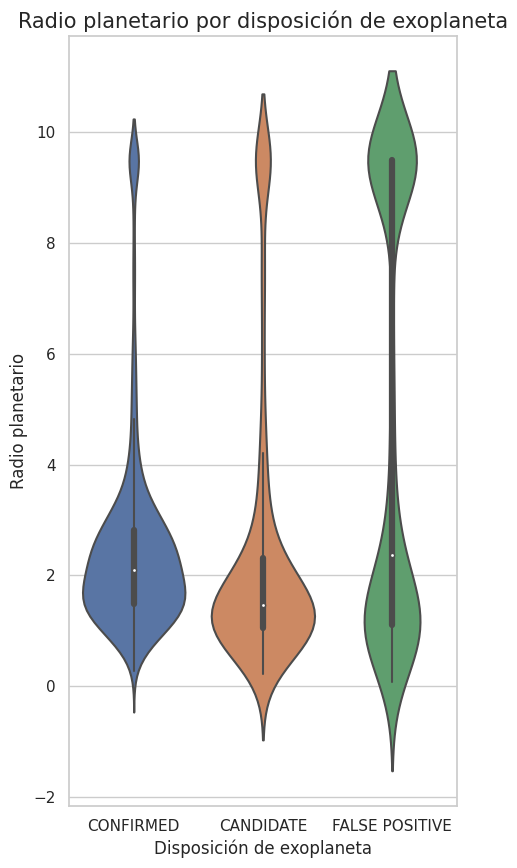

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.violinplot(data=df_filtrado, x='disposicion_archivo', y='radio_planetario')
ax.set_title("Radio planetario por disposición de exoplaneta", fontsize=15)
ax.set(xlabel="Disposición de exoplaneta", ylabel="Radio planetario");

A pesar de tener medianas muy parecidas, en los falsos positivos se observa un rango intercuartílico mayor, lo que indica radios más extremos que los exoplanetas confirmados.

## Correlaciones y Regresión Lineal Simple

A continuación exploraremos las relaciones que existen entre las diferentes variables del Dataset. Para esto, generaremos una tabla y un heatmap para visualizar el coeficiente de correlación de Pearson entre todas las variables.

In [ ]:
df_kepler_clean.corr()

<ipython-input-54-5b35ef18441c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kepler_clean.corr()


,kepid,transito_contaminante_no_transitivo,transito_contaminante_estrella_secundaria,transito_contaminante_eclipsante_binario,transito_contaminante_candidato_eclipsante_binario,periodo_de_transito,tiempo_transito_referencia,impacto_estelar,duracion_de_transito,profundidad_de_transito,...,temperatura_equilibrio,insolacion_recibida,modelo_snr,temperatura_efectiva_estrella_anfitriona,gravedad_superficial_estrella_anfitriona,radio_de_estrella_anfitriona,masa_estrella,ascension_recta_estrella,declinacion_estrella,magnitud_aparente_estrella_anfitriona
kepid,1.000000,0.008889,-0.047020,-0.101414,-0.045307,0.011519,0.012072,0.000385,-0.025713,-0.017452,...,-0.058651,-0.012522,0.000990,-0.025480,0.052330,-0.027203,-0.036126,-0.003566,0.993594,0.020951
transito_contaminante_no_transitivo,0.008889,1.000000,-0.022291,-0.003624,0.001406,0.001458,0.015795,0.001844,0.015672,-0.005422,...,-0.004702,-0.000111,-0.007878,0.001885,-0.001981,0.000393,0.005951,0.012878,0.008728,-0.003070
transito_contaminante_estrella_secundaria,-0.047020,-0.022291,1.000000,0.146376,0.092228,-0.020051,-0.114637,0.042268,0.027352,0.426296,...,0.204885,0.039770,0.437964,0.107831,-0.076211,0.047236,0.059793,0.088038,-0.046597,-0.006370
transito_contaminante_eclipsante_binario,-0.101414,-0.003624,0.146376,1.000000,0.523859,-0.020461,-0.124243,0.005350,-0.049423,-0.125215,...,0.268115,0.023011,-0.127540,0.017722,-0.018884,0.041567,0.009092,0.164442,-0.099894,0.058850
transito_contaminante_candidato_eclipsante_binario,-0.045307,0.001406,0.092228,0.523859,1.000000,-0.016654,-0.100888,-0.004963,0.017895,-0.086795,...,0.217627,0.030383,-0.089811,0.011637,0.002058,0.019285,-0.009954,0.072596,-0.046172,0.036961
periodo_de_transito,0.011519,0.001458,-0.020051,-0.020461,-0.016654,1.000000,0.094902,0.004929,0.037293,-0.009181,...,-0.049096,-0.002593,-0.009614,-0.013552,0.001878,-0.000994,-0.004991,0.005916,0.011494,-0.010644
tiempo_transito_referencia,0.012072,0.015795,-0.114637,-0.124243,-0.100888,0.094902,1.000000,0.049248,0.220573,-0.051021,...,-0.324452,-0.022197,-0.058783,0.008372,-0.006204,-0.004930,0.012433,-0.030257,0.011088,0.006540
impacto_estelar,0.000385,0.001844,0.042268,0.005350,-0.004963,0.004929,0.049248,1.000000,0.036958,0.005602,...,-0.009987,-0.003658,-0.000476,0.016069,-0.059279,0.022646,0.069262,0.022469,-0.001781,-0.009796
duracion_de_transito,-0.025713,0.015672,0.027352,-0.049423,0.017895,0.037293,0.220573,0.036958,1.000000,0.067275,...,-0.194724,-0.018875,0.083583,0.106206,-0.122233,0.013672,0.107576,0.032395,-0.027372,-0.102324
profundidad_de_transito,-0.017452,-0.005422,0.426296,-0.125215,-0.086795,-0.009181,-0.051021,0.005602,0.067275,1.000000,...,0.080747,-0.006309,0.579733,0.113611,-0.008373,-0.016824,0.028521,0.028552,-0.018049,0.042719


<ipython-input-55-65cad0d7ce0f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_kepler_clean.corr(), vmin=-1, vmax=1, annot=True, cmap="RdYlBu", linewidths=.5)


Text(0.5, 1.0, 'Tabla de Correlación de Pearson para mediciones del Satélite Kepler')

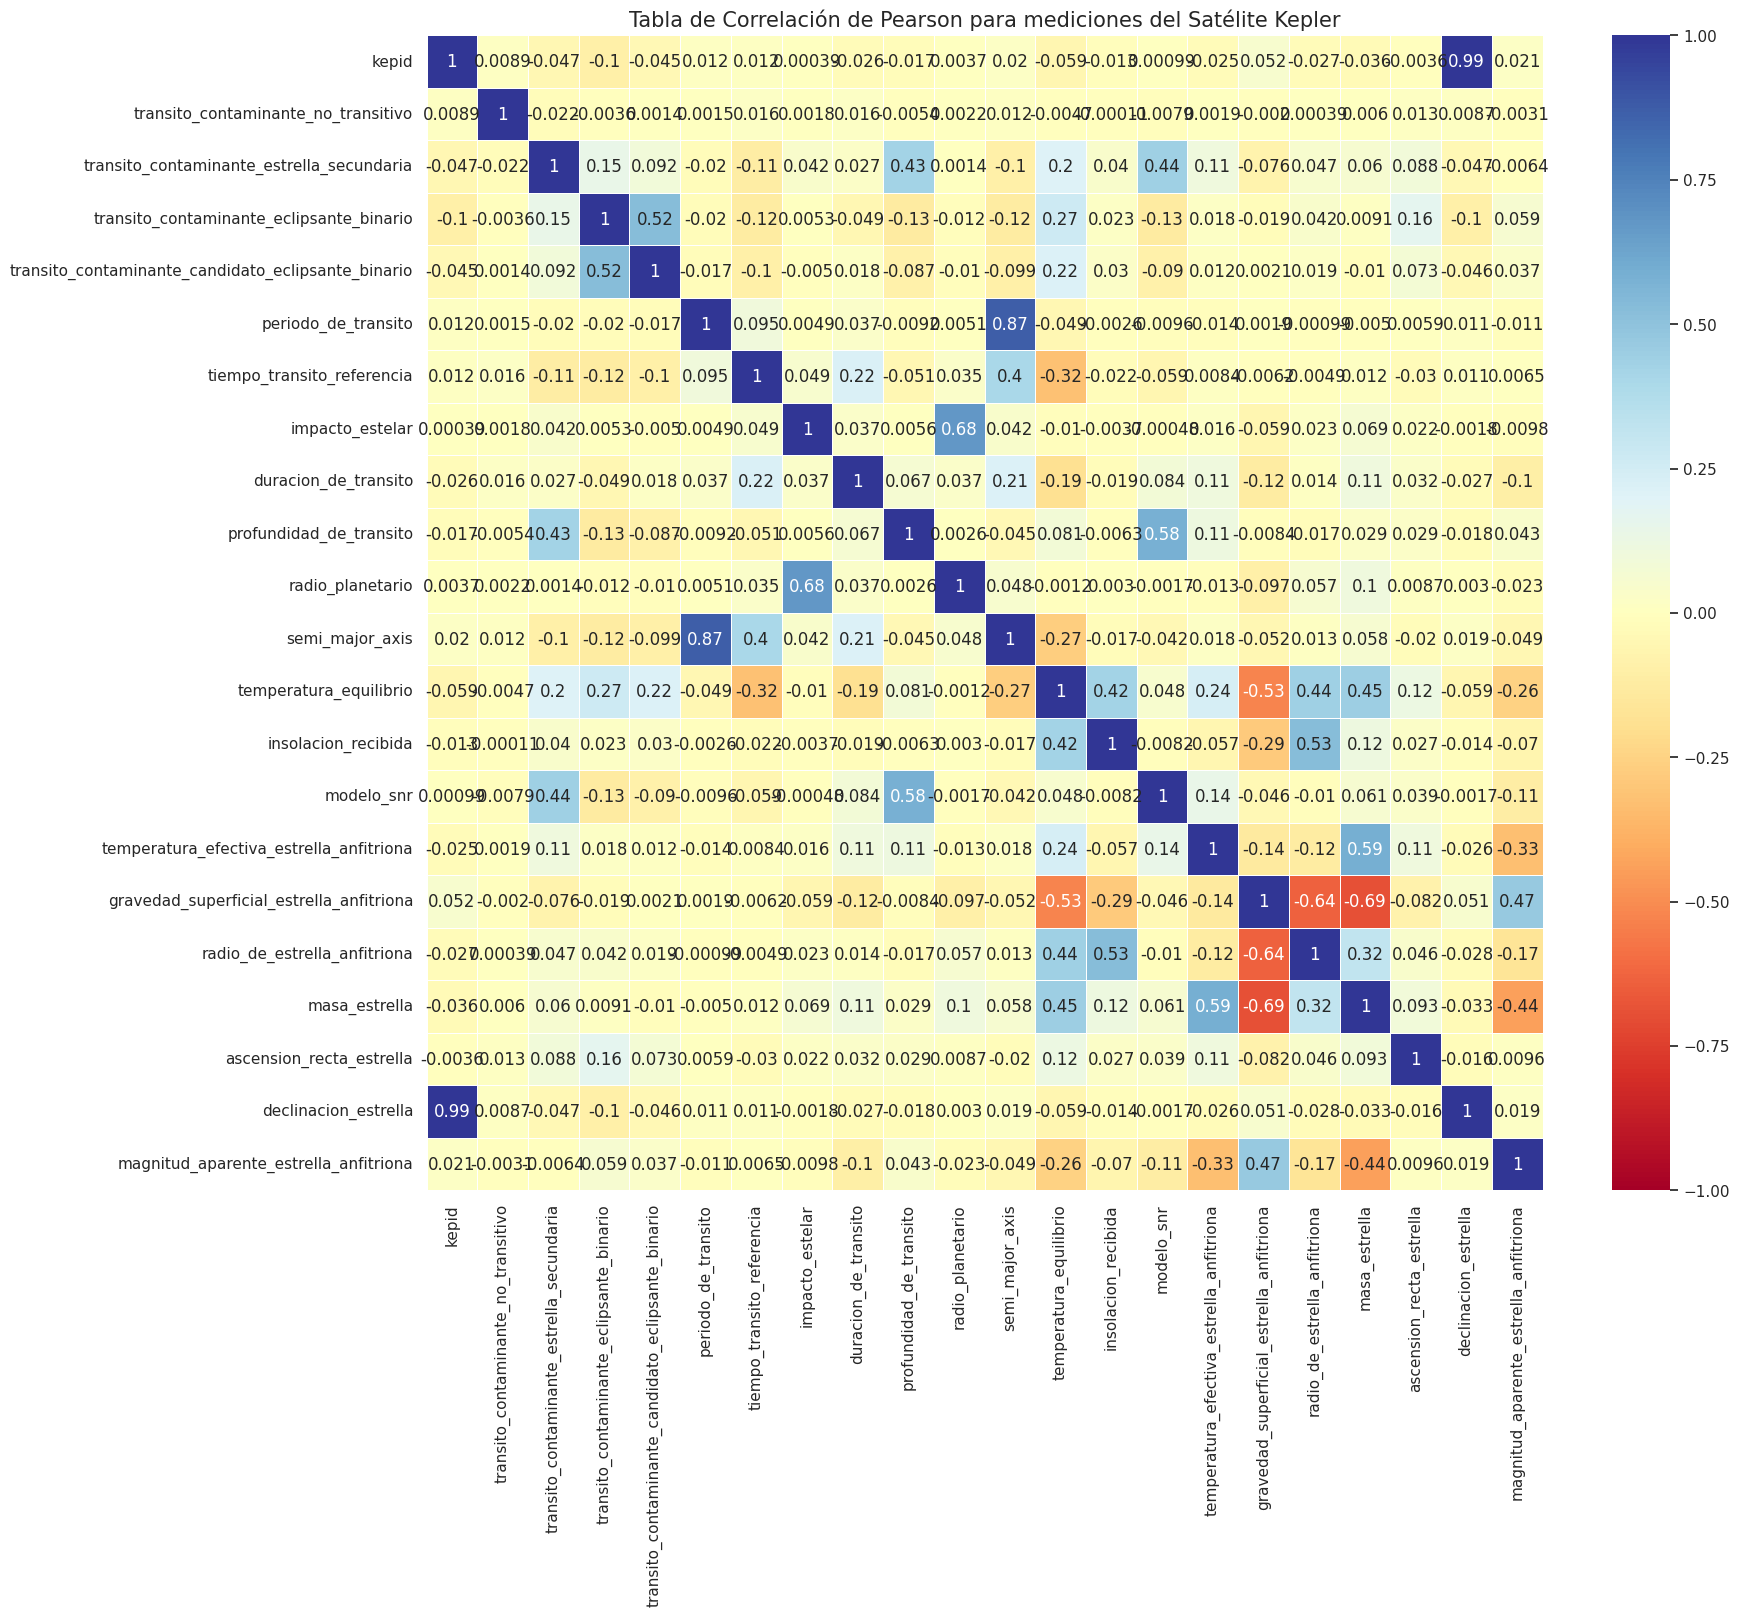

In [ ]:
plt.figure(figsize=(18, 15))
ax = sns.heatmap(df_kepler_clean.corr(), vmin=-1, vmax=1, annot=True, cmap="RdYlBu", linewidths=.5)
ax.set_title('Tabla de Correlación de Pearson para mediciones del Satélite Kepler', fontsize=15)

Correlación entre el periodo orbital de los exoplanetas y la distancia a la estrella anfitriona

In [ ]:
print(f'Correlación entre el periodo orbital y la distancia a la estrella anfitriona: {df_kepler_clean["periodo_de_transito"].corr(df_kepler_clean["semi_major_axis"])}')

Correlación entre el periodo orbital y la distancia a la estrella anfitriona: 0.8718207893320736


Del análisis anterior, podemos destacar que la correlación más fuerte es la que existe entre el semieje mayor y el período de tránsito. De hecho existe una relación entre ambas cantidades conocida como la Tercera Ley de Kepler, que estipula que el cuadrado del período ($T$) es proporcional al cubo del semieje mayor ($a$), e inversamente proporcional a la masa ($M$) de la estrella anfitriona $T^2=C a^3/M$, con $C$ como una constante. Tomando el logaritmo natural en ambos miembros, obtenemos una relación lineal de la forma $2\ln T=3\ln a-ln M+\ln C$ que podemos ajustar con una gregresión lineal múltiple de la forma $ln M=3\ln a-2\ln T+\ln C$, con $\ln M$ como variable dependiente.

Para comenzar hacemos una limpieza de las variables relevantes para eliminar valores atípicos.

In [ ]:
df_k1=filtro_1(df_filtrado,"masa_estrella")
df_k2=filtro_1(df_k1,"semi_major_axis")
df_k3=filtro_1(df_k2,"periodo_de_transito")

En primer lugar, obtenemos los logaritmos de "masa_estrella", "semi_major_axis" y "periodo_de_transito" y los insertamos como columnas en un nuevo dataframe.

In [ ]:
df_k3["ln_masa"]= df_k3["masa_estrella"].apply(np.log)
df_k3["ln_eje"] = df_k3["semi_major_axis"].apply(np.log)
df_k3["ln_periodo"] = df_k3["periodo_de_transito"].apply(np.log)

<ipython-input-58-785a967c4abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k3["ln_masa"]= df_k3["masa_estrella"].apply(np.log)
<ipython-input-58-785a967c4abf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k3["ln_eje"] = df_k3["semi_major_axis"].apply(np.log)
<ipython-input-58-785a967c4abf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

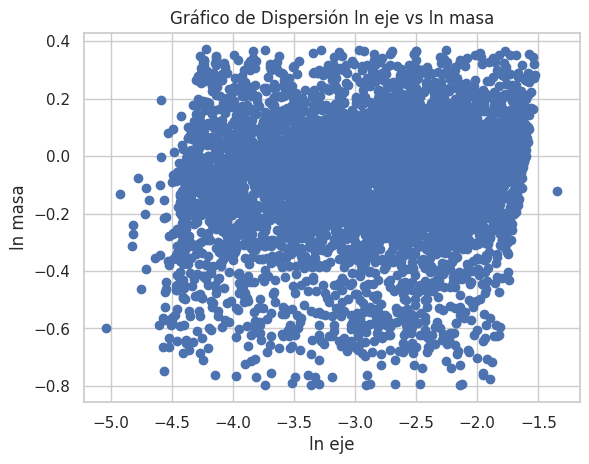

In [ ]:
plt.scatter(df_k3["ln_eje"], df_k3["ln_masa"], c='b')
plt.title("Gráfico de Dispersión ln eje vs ln masa")
plt.xlabel("ln eje")
plt.ylabel("ln masa");

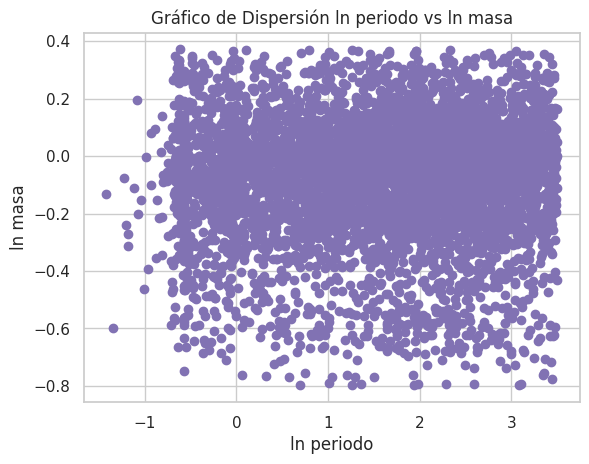

In [ ]:
plt.scatter(df_k3["ln_periodo"], df_k3["ln_masa"], c='m')
plt.title("Gráfico de Dispersión ln periodo vs ln masa")
plt.xlabel("ln periodo")
plt.ylabel("ln masa");

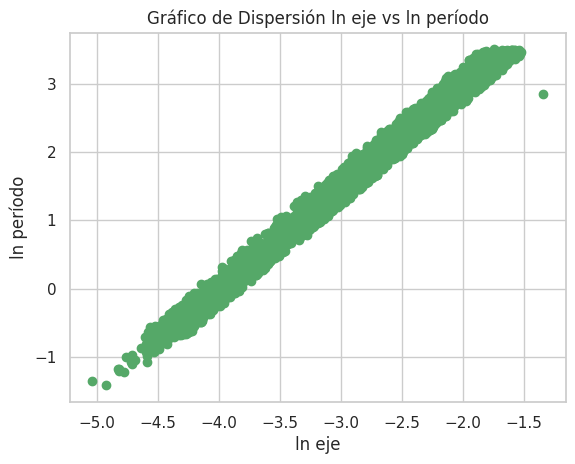

In [ ]:
plt.scatter(df_k3["ln_eje"], df_k3["ln_periodo"], c='g')
plt.title("Gráfico de Dispersión ln eje vs ln período")
plt.xlabel("ln eje")
plt.ylabel("ln período");

A continuación, separaremos los datos en datasets de entrenamiento y prueba usando scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_k3[["ln_eje","ln_periodo"]]
y = df_k3['ln_masa']

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Ahora entrenamos un modelo de Regresión Lineal Múltiple con el dataset de entrenamiento.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr1 = LinearRegression()
lr1.fit(X_training, y_training)

LinearRegression()

Los coefficientes del ajuste coincide con el modelo teórico de la tercera ley de Kepler del movimiento planetario $ln M=3\ln a-2\ln T+\ln C$

In [ ]:
lr1.coef_

array([ 2.90782755, -1.93905394])

In [ ]:
lr1.intercept_

11.435726964092323

Finalmente evaluamos el modelo usando el dataset de prueba, arrojando un ajuste casi perfecto.

In [ ]:
lr1.score(X_test, y_test)

0.9984435435571781

In [ ]:
ln_masa_predict = lr1.predict(df_k3[["ln_eje","ln_periodo"]])

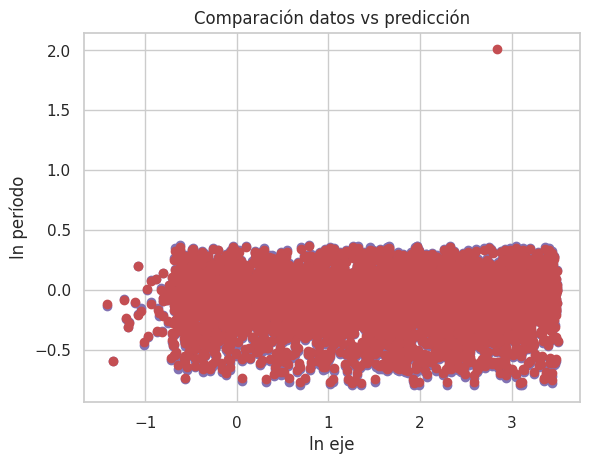

In [ ]:
plt.scatter(df_k3["ln_periodo"], df_k3["ln_masa"], c='m')
plt.scatter(df_k3["ln_periodo"],  ln_masa_predict, c='r')
plt.title("Comparación datos vs predicción")
plt.xlabel("ln eje")
plt.ylabel("ln período");

### Validación Cruzada de K-Iteraciones

En esta sección, aplicaremos la validación cruzada para evaluar el modelo predictivo introducido en la sección anterior.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr1, X, y, scoring='r2')

In [ ]:
scores

{'fit_time': array([0.00627851, 0.00315571, 0.00320148, 0.00453019, 0.00297189]),
 'score_time': array([0.0053575 , 0.00149417, 0.00220084, 0.00152373, 0.00144482]),
 'test_score': array([0.99850053, 0.99867288, 0.99868113, 0.89845208, 0.99859871])}

In [ ]:
print(f'Calificaciones del modelo 3a ley de Kepler con objetos del satélite Kepler: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Calificaciones del modelo 3a ley de Kepler con objetos del satélite Kepler: 0.979 +/- 0.040


Lo cual indica que la tercera ley de Kepler, que es válida para los planetas de nuestro sistema solar desde el siglo XVII, también se aplica a los exoplanetas descubiertos por el satélite Kepler en el siglo XXI de acuerdo con una validación cruzada de K iteraciones.

## Machine Learning: Clasificación No Supervisada y Supervisada

## K-Medias

Por medio del algoritmo de K-Medias vamos a agrupar los objetos de acuerdo a su periodo de tránsito y radio planetario.

In [ ]:
df_k_medias = df_filtrado[["periodo_de_transito", "radio_planetario"]]
df_k_medias

,periodo_de_transito,radio_planetario
0,9.488036,2.26
1,39.350240,2.83
2,19.899140,9.50
3,1.736952,9.50
4,2.525592,2.75
...,...,...
9194,8.589871,1.11
9195,0.527699,9.50
9196,1.739849,0.72
9197,0.681402,1.07


Usamos un scatterplot para visualizar los objetos por periodo y radio.

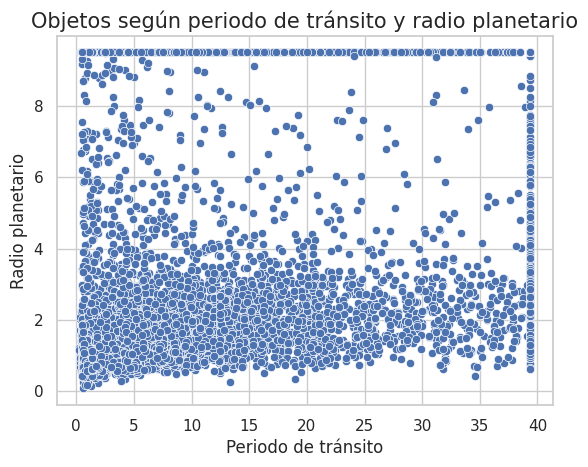

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Objetos según periodo de tránsito y radio planetario', fontsize=15)
ax.set_xlabel('Periodo de tránsito')
ax.set_ylabel('Radio planetario')

sns.scatterplot(x=df_k_medias['periodo_de_transito'], y=df_k_medias['radio_planetario'], ax=ax);

Usando el método del codo, obtenemos el número de clústers adecuado para usar con k-means.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for n in range(1, 11):
  model = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=10000)
  model.fit(df_k_medias[['periodo_de_transito', 'radio_planetario']])
  inertia.append(model.inertia_)

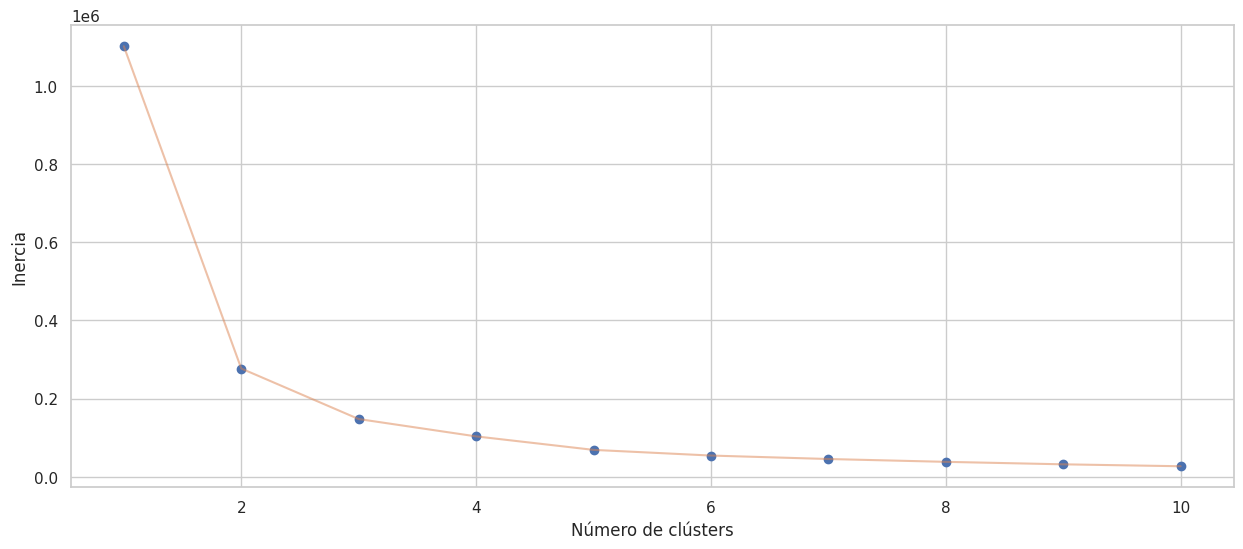

In [ ]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel("Número de clústers")
plt.ylabel("Inercia");

In [ ]:
k_means = KMeans(n_clusters=4, max_iter=10000)

In [ ]:
k_means.fit(df_k_medias[['periodo_de_transito', 'radio_planetario']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=4)

In [ ]:
centers = k_means.cluster_centers_
centers

array([[17.02716332,  3.16819638],
       [ 3.98640583,  1.55220542],
       [36.69019503,  3.89078972],
       [ 3.44318956,  9.23568844]])

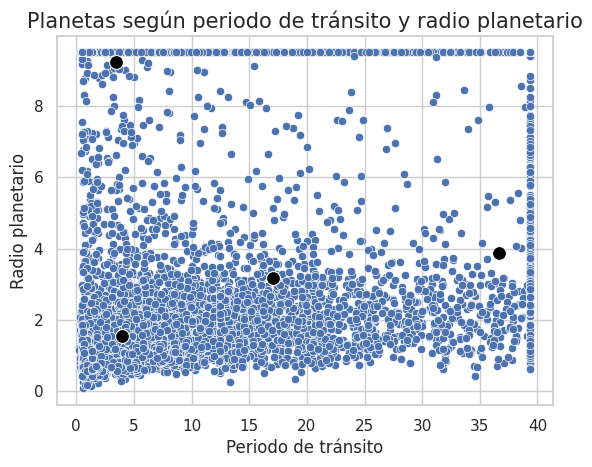

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Planetas según periodo de tránsito y radio planetario', fontsize=15)
ax.set_xlabel('Periodo de tránsito')
ax.set_ylabel('Radio planetario')

sns.scatterplot(x=df_k_medias['periodo_de_transito'], y=df_k_medias['radio_planetario']);
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

Una vez obtenidos los puntos, clasificamos los objetos.

In [ ]:
clasificaciones = k_means.predict(df_k_medias[['periodo_de_transito', 'radio_planetario']])

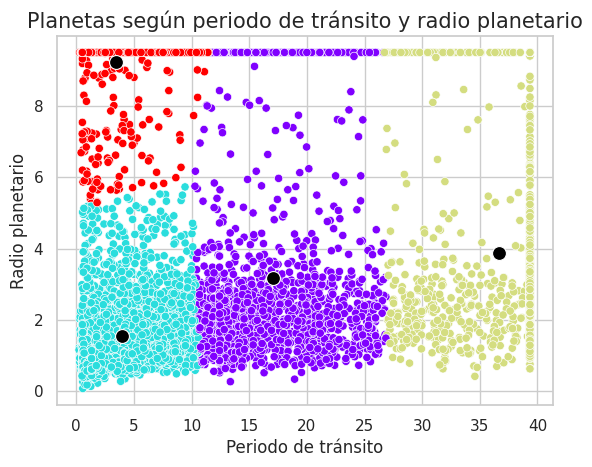

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Planetas según periodo de tránsito y radio planetario', fontsize=15)
ax.set_xlabel('Periodo de tránsito')
ax.set_ylabel('Radio planetario')

sns.scatterplot(x=df_k_medias['periodo_de_transito'], y=df_k_medias['radio_planetario'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [ ]:
df_k_medias["grupo"] = clasificaciones

<ipython-input-88-27085dd931d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k_medias["grupo"] = clasificaciones


In [ ]:
df_k_medias

,periodo_de_transito,radio_planetario,grupo
0,9.488036,2.26,1
1,39.350240,2.83,2
2,19.899140,9.50,0
3,1.736952,9.50,3
4,2.525592,2.75,1
...,...,...,...
9194,8.589871,1.11,1
9195,0.527699,9.50,3
9196,1.739849,0.72,1
9197,0.681402,1.07,1


In [ ]:
df_k_medias["grupo"].unique()

array([1, 2, 0, 3], dtype=int32)

In [ ]:
group_0 = df_k_medias[df_k_medias['grupo'] == 0]
group_1 = df_k_medias[df_k_medias['grupo'] == 1]
group_2 = df_k_medias[df_k_medias['grupo'] == 2]
group_3 = df_k_medias[df_k_medias['grupo'] == 3]

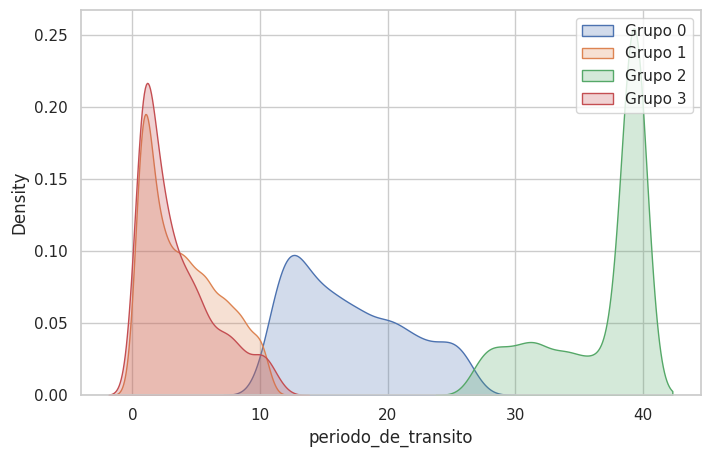

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='periodo_de_transito', ax=ax, label='Grupo 0', fill=True)
sns.kdeplot(data=group_1, x='periodo_de_transito', ax=ax, label='Grupo 1', fill=True)
sns.kdeplot(data=group_2, x='periodo_de_transito', ax=ax, label='Grupo 2', fill=True)
sns.kdeplot(data=group_3, x='periodo_de_transito', ax=ax, label='Grupo 3', fill=True)
ax.legend();

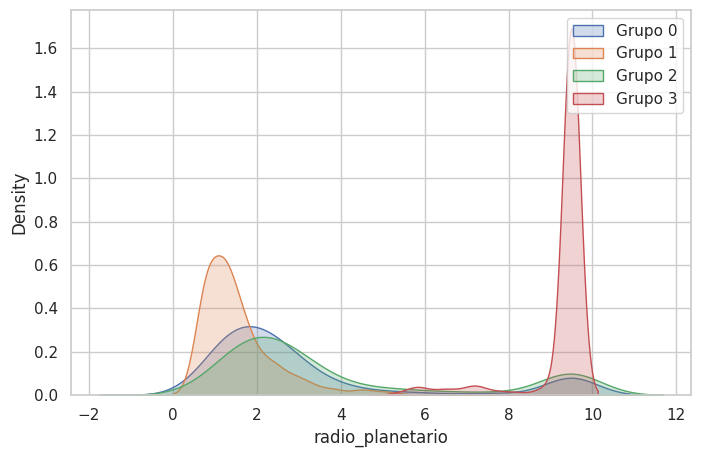

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='radio_planetario', ax=ax, label='Grupo 0', fill=True)
sns.kdeplot(data=group_1, x='radio_planetario', ax=ax, label='Grupo 1', fill=True)
sns.kdeplot(data=group_2, x='radio_planetario', ax=ax, label='Grupo 2', fill=True)
sns.kdeplot(data=group_3, x='radio_planetario', ax=ax, label='Grupo 3', fill=True)
ax.legend();

### Regresión logística

Se usará la regresión logística para intentar predecir si un exoplaneta será confirmado o será clasificado como falso positivo.

In [ ]:
df_ml = df_filtrado.copy()
df_ml.head()

,kepid,disposicion_archivo,disposicion_datos_kepler,transito_contaminante_no_transitivo,transito_contaminante_estrella_secundaria,transito_contaminante_eclipsante_binario,transito_contaminante_candidato_eclipsante_binario,periodo_de_transito,tiempo_transito_referencia,impacto_estelar,...,temperatura_equilibrio,insolacion_recibida,modelo_snr,temperatura_efectiva_estrella_anfitriona,gravedad_superficial_estrella_anfitriona,radio_de_estrella_anfitriona,masa_estrella,ascension_recta_estrella,declinacion_estrella,magnitud_aparente_estrella_anfitriona
0,10797460,CONFIRMED,CANDIDATE,0,0,0,0,9.488036,170.538750,0.146,...,793.0,93.59,35.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,10797460,CONFIRMED,CANDIDATE,0,0,0,0,39.350240,162.513840,0.586,...,443.0,9.11,25.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,10811496,CANDIDATE,CANDIDATE,0,0,0,0,19.899140,175.850252,0.969,...,638.0,39.30,76.3,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
3,10848459,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,...,1395.0,891.96,505.6,5805.0,4.564,0.791,0.836,285.53461,48.285210,15.597
4,10854555,CONFIRMED,CANDIDATE,0,0,0,0,2.525592,171.595550,0.701,...,1406.0,926.16,40.9,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509


La disposición de archivo tiene tres valores posibles: confirmado, candidato y falso positivo. Se le asigna el valor de 1 a "confirmado" y 0 a "falso positivo". Se eliminan los exoplanetas que aún no han tienen el estado de candidatos pues estos no sirven para nuestro análisis.

In [ ]:
df_ml['disposicion_archivo'].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [ ]:
df_ml.shape

(6656, 24)

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df_ml["disposicion_archivo"])

LabelEncoder()

In [ ]:
le.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [ ]:
le.transform(df_ml["disposicion_archivo"])

array([1, 1, 0, ..., 0, 2, 2])

In [ ]:
df_ml['disposicion_archivo'] = le.transform(df_ml['disposicion_archivo'])

Eliminamos los valores con falsos positivos pues no sirven para nuestro análisis.

In [ ]:
df_ml = df_ml[df_ml["disposicion_archivo"]<2]

In [ ]:
df_ml.head()

,kepid,disposicion_archivo,disposicion_datos_kepler,transito_contaminante_no_transitivo,transito_contaminante_estrella_secundaria,transito_contaminante_eclipsante_binario,transito_contaminante_candidato_eclipsante_binario,periodo_de_transito,tiempo_transito_referencia,impacto_estelar,...,temperatura_equilibrio,insolacion_recibida,modelo_snr,temperatura_efectiva_estrella_anfitriona,gravedad_superficial_estrella_anfitriona,radio_de_estrella_anfitriona,masa_estrella,ascension_recta_estrella,declinacion_estrella,magnitud_aparente_estrella_anfitriona
0,10797460,1,CANDIDATE,0,0,0,0,9.488036,170.538750,0.146,...,793.0,93.59,35.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,10797460,1,CANDIDATE,0,0,0,0,39.350240,162.513840,0.586,...,443.0,9.11,25.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,10811496,0,CANDIDATE,0,0,0,0,19.899140,175.850252,0.969,...,638.0,39.30,76.3,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
4,10854555,1,CANDIDATE,0,0,0,0,2.525592,171.595550,0.701,...,1406.0,926.16,40.9,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509
5,10872983,1,CANDIDATE,0,0,0,0,11.094321,171.201160,0.538,...,835.0,114.81,66.5,6046.0,4.486,0.972,1.053,296.28613,48.224670,15.714


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Se entrena el modelo usando como variable dependiente la disposición de archivo y el resto de columnas como variables independientes.

In [ ]:
X = df_ml.drop(columns=['disposicion_archivo', 'disposicion_datos_kepler', 'kepid'])
y = df_ml['disposicion_archivo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr = LogisticRegression(max_iter=10000)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Una vez obtenido el modelo, se usa el dataset de prueba para hacer predicciones.

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

0.3487972508591065

In [ ]:
lr.score(X_test, y_test)

0.6512027491408935

In [ ]:
np.sum(cross_val_score(lr, X, y)) / 5

0.665721649484536

Nuestro modelo de regresión logística predijo correctamente la disposición para más del 70% de las muestras de prueba, por lo que el modelo puede considerarse bastante predictivo.

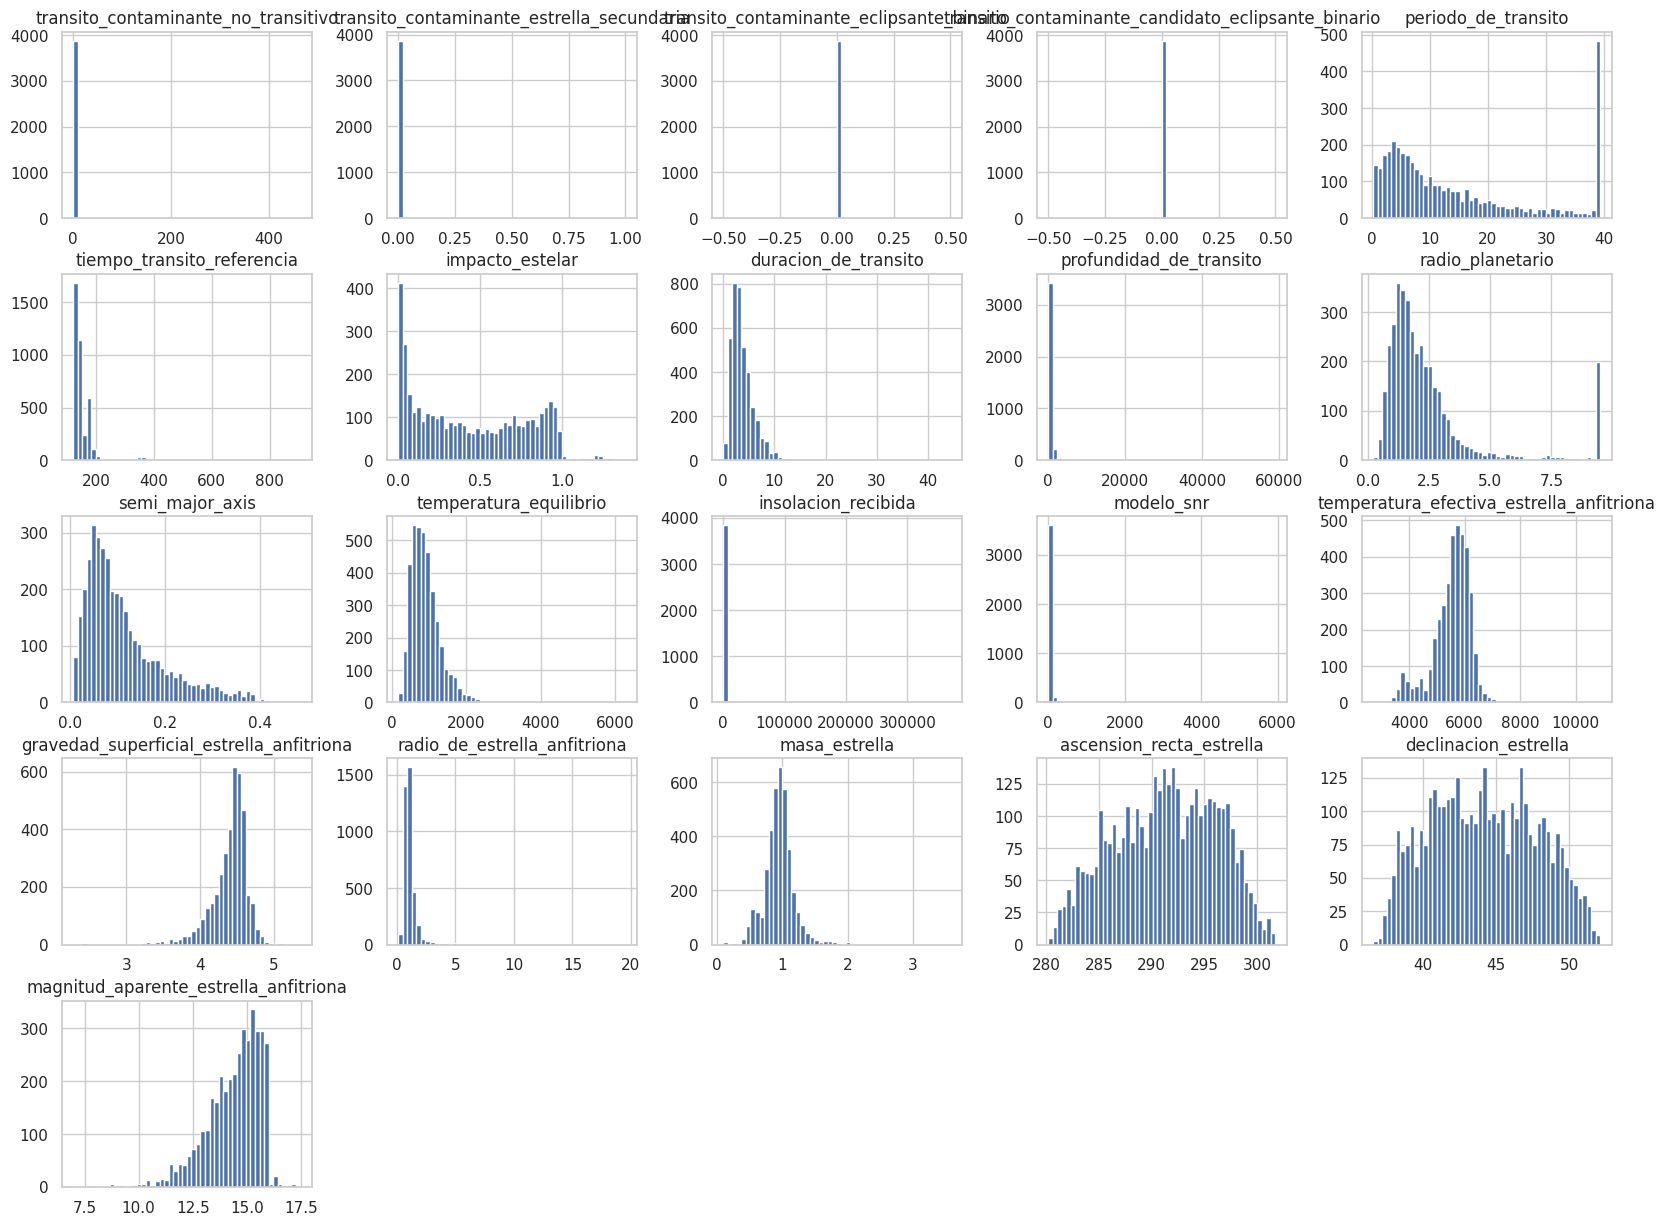

In [ ]:
X.hist(bins=50, figsize=(20, 15));

#### Regresión polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X.head()

,transito_contaminante_no_transitivo,transito_contaminante_estrella_secundaria,transito_contaminante_eclipsante_binario,transito_contaminante_candidato_eclipsante_binario,periodo_de_transito,tiempo_transito_referencia,impacto_estelar,duracion_de_transito,profundidad_de_transito,radio_planetario,...,temperatura_equilibrio,insolacion_recibida,modelo_snr,temperatura_efectiva_estrella_anfitriona,gravedad_superficial_estrella_anfitriona,radio_de_estrella_anfitriona,masa_estrella,ascension_recta_estrella,declinacion_estrella,magnitud_aparente_estrella_anfitriona
0,0,0,0,0,9.488036,170.538750,0.146,2.9575,616.0,2.26,...,793.0,93.59,35.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,0,0,0,0,39.350240,162.513840,0.586,4.5070,875.0,2.83,...,443.0,9.11,25.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,0,0,0,0,19.899140,175.850252,0.969,1.7822,10800.0,9.50,...,638.0,39.30,76.3,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
4,0,0,0,0,2.525592,171.595550,0.701,1.6545,603.0,2.75,...,1406.0,926.16,40.9,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509
5,0,0,0,0,11.094321,171.201160,0.538,4.5945,1520.0,3.90,...,835.0,114.81,66.5,6046.0,4.486,0.972,1.053,296.28613,48.224670,15.714


In [ ]:
lr_1 = LogisticRegression(max_iter=10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr_1 = LogisticRegression(max_iter=10000)
lr_1.fit(X_train, y_train)
print(f"R1 Train: {lr_1.score(X_train, y_train)}")
print(f"R1 Test: {lr_1.score(X_test, y_test)}")
print(f"R1 Cross Val: {np.sum(cross_val_score(lr_1, X_train, y_train)) / 5}")

R1 Train: 0.6756259204712813
R1 Test: 0.6726804123711341
R1 Cross Val: 0.6730459863503413


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
poly_2 = PolynomialFeatures(degree=2)
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

lr_2 = LogisticRegression(max_iter=10000)
lr_2.fit(X_train_scaled, y_train)

print(f"R2 Train: {lr_2.score(X_train_scaled, y_train)}")
print(f"R2 Test: {lr_2.score(X_test_scaled, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_2, X_train_scaled, y_train)) / 5}")

R2 Train: 0.8295287187039765
R2 Test: 0.8187285223367697
Cross Val: 0.8015443884736214


In [ ]:
poly_3 = PolynomialFeatures(degree=3)
X_train_3 = poly_3.fit_transform(X_train)
X_test_3 = poly_3.fit_transform(X_test)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_3)
X_test_scaled = scaler.transform(X_test_3)

lr_3 = LogisticRegression(max_iter=10000)
lr_3.fit(X_train_scaled, y_train)

print(f"R3 Train: {lr_3.score(X_train_scaled, y_train)}")
print(f"R3 Test: {lr_3.score(X_test_scaled, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_3, X_train_scaled, y_train)) / 5}")

R3 Train: 0.8648748159057438
R3 Test: 0.8298969072164949
Cross Val: 0.8228990629400933


In [ ]:
poly_4 = PolynomialFeatures(degree=4)
X_train_4 = poly_4.fit_transform(X_train)
X_test_4 = poly_4.fit_transform(X_test)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_4)
X_test_scaled = scaler.transform(X_test_4)

lr_4 = LogisticRegression(max_iter=10000)
lr_4.fit(X_train_scaled, y_train)

print(f"R4 Train: {lr_4.score(X_train_scaled, y_train)}")
print(f"R4 Test: {lr_4.score(X_test_scaled, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_4, X_train_scaled, y_train)) / 5}")

R4 Train: 0.8818114874815906
R4 Test: 0.8393470790378007
Cross Val: 0.8192171758206046


In [ ]:
poly_5 = PolynomialFeatures(degree=5)
X_train_5 = poly_5.fit_transform(X_train)
X_test_5 = poly_5.fit_transform(X_test)

# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_5)
X_test_scaled = scaler.transform(X_test_5)

lr_5 = LogisticRegression(max_iter=10000)
lr_5.fit(X_train_scaled, y_train)

print(f"R5 Train: {lr_5.score(X_train_scaled, y_train)}")
print(f"R5 Test: {lr_5.score(X_test_scaled, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_5, X_train_scaled, y_train)) / 5}")

R5 Train: 0.8972754050073638
R5 Test: 0.8402061855670103


### Matriz de confusión

A continuación, se evaluará el modelo utilizando una matriz de confusión.

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[1085,  306],
       [ 168,  617]])

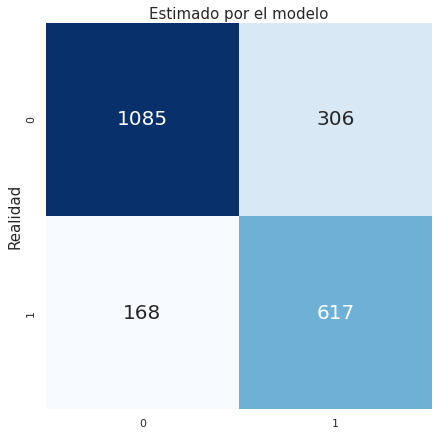

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Los resultados del modelo son los siguientes:
* Verdadero positivo: 1060
* Verdadero negativo: 496
* Falso positivo: 308
* Falso negativo: 312

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_predict))
print("Exactitud:",metrics.accuracy_score(y_test, y_predict))
print("Sensibilidad:",metrics.recall_score(y_test, y_predict))
print("Especificidad:", tn / (tn + fp))

Precision: 0.6684723726977249
Exactitud: 0.7821691176470589
Sensibilidad: 0.7859872611464969
Especificidad: 0.7800143781452192


Con esto podemos concluir que nuestro modelo puede clasificar correctamente más del 70% de los exoplanetas, por lo que es un buen modelo.

### Curva ROC/AUC

Por último, evaluaremos nuestro modelo utilizando una curva ROC/AUC.

In [ ]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba[:10,:]

array([[3.39376924e-01, 6.60623076e-01],
       [3.09646969e-01, 6.90353031e-01],
       [3.96007510e-01, 6.03992490e-01],
       [4.73641152e-01, 5.26358848e-01],
       [3.36677061e-01, 6.63322939e-01],
       [5.55916254e-01, 4.44083746e-01],
       [9.99910105e-01, 8.98951693e-05],
       [9.93364649e-01, 6.63535117e-03],
       [3.32366514e-01, 6.67633486e-01],
       [9.59755956e-01, 4.02440439e-02]])

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

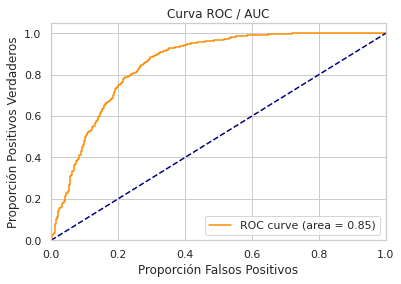

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Falsos Positivos')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Observando la curva obtenida, concluimos que nuestro modelo es muy bueno para diferenciar entre positivos y negativos, y además es muy probable que elija el valor correcto.